In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")


# Open access from subho's google drive
GOOGLE_SHEET_ID = '1oBmEgJ4pQIp-gxD-EMOYHVgvQxqZbZ4h9RgziQ7cqDQ'


sheet_1 = pd.read_csv('https://docs.google.com/spreadsheets/d/' + 
                   GOOGLE_SHEET_ID +
                   '/export?gid=0&format=csv',
                   # Set first column as rownames in data frame
                   index_col=0
                  )
sheet_1.head(10)

,REGISTRATION/YEAR,GENDER,BIRTH WEIGHT(kg),LENGTH(cm),FOOT-LENGTH(mm),MODE OF DELIVERY,INDICATION,MATERNAL HIGH RISK FACTORS,GA LMP (weeks),GA USG(weeks),GA BALLARD(weeks)
SL NO.,,,,,,,,,,,
1,64/50624/2018,female,3.974,50.0,80.0,LSCS,polyhydramnios with scar tenderness,hypothyroidism,38.4,38.2,40.0
2,63/50624/2018,female,2.773,50.0,76.7,LSCS,prom with unfav cervix,-,38.0,37.0,38.0
3,65/50733/2018,male,2.245,50.0,70.0,LSCS,Iugr with less liquor,NaN,35.0,35.1,36.0
4,90/4818/2018,female,1.810,50.0,61.9,LSCS,NaN,NaN,32.0,31.2,32.0
5,91/4881/2018,male,3.377,50.0,79.7,LSCS,post-dated,NaN,40.0,38.2,38.0
6,103/31308/2018,male,2.367,50.0,71.8,FTND,NaN,psychiatric medication and hypothyroidism,37.5,36.0,34.0
7,106/51359/2018,female,3.166,50.0,79.3,FTND,NaN,NaN,39.2,38.2,38.0
8,109/6057/2018,male,3.025,50.0,80.1,LSCS,prom,-,39.3,38.0,40.0
9,111/51446/2018,female,2.742,50.0,75.5,LSCS,CPD,-,38.4,36.5,36.0


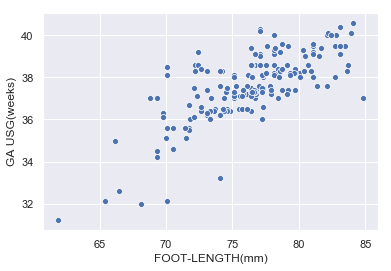

In [8]:
# sanity plots

sns.scatterplot(x="FOOT-LENGTH(mm)", y="GA USG(weeks)", data=sheet_1)

[14.70309291]
[[0.29995055]]


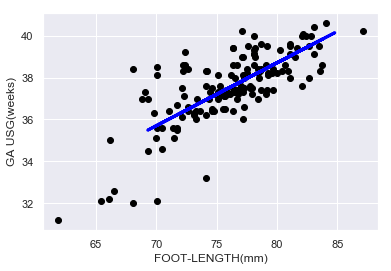

In [122]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
import numpy as np

length = 188

X = sheet_1.iloc[:, 4][:length].values 
y = sheet_1.iloc[:, 9][:length].values 
X = X.reshape(length, 1)
y = y.reshape(length, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

lr = LinearRegression()
lr.fit(X_train, y_train) 
print(lr.intercept_)  
print(lr.coef_)
y_pred = lr.predict(X_test)  

# Plot outputs
plt.scatter(X_train, y_train,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks()
plt.yticks()

plt.ylabel("GA USG(weeks)")
plt.xlabel("FOOT-LENGTH(mm)")

plt.show()

In [123]:
#List range of GA USG
F_length = list(range(57,83))
GA_usg = [lr.coef_[0][0]*x+lr.intercept_[0] for x in F_length]
df = pd.DataFrame()
df['Foot_length'] = F_length
df['GA_USG'] = GA_usg

df.head(len(GA_usg))

,Foot_length,GA_USG
0,57,31.800274
1,58,32.100225
2,59,32.400176
3,60,32.700126
4,61,33.000077
5,62,33.300027
6,63,33.599978
7,64,33.899928
8,65,34.199879
9,66,34.499829


In [124]:
# Get correlation coeff. r between GA_USG and Foot Length

sheet_1["FOOT-LENGTH(mm)"].corr(sheet_1["GA USG(weeks)"])

0.7388456439832404

In [130]:
import scipy
#pearson's co-relation
scipy.stats.pearsonr(X_train, y_train)

(array([0.74815478]), array([3.75527356e-28]))

In [126]:
#student T test
scipy.stats.ttest_ind(X_train, y_train)

Ttest_indResult(statistic=array([101.68090492]), pvalue=array([2.15142251e-233]))

In [127]:
#bracketing data

df = sheet_1.round({"GA USG(weeks)": 0}).sort_values(["GA USG(weeks)"], ascending=[1])
df.head()

,REGISTRATION/YEAR,GENDER,BIRTH WEIGHT(kg),LENGTH(cm),FOOT-LENGTH(mm),MODE OF DELIVERY,INDICATION,MATERNAL HIGH RISK FACTORS,GA LMP (weeks),GA USG(weeks),GA BALLARD(weeks)
SL NO.,,,,,,,,,,,
4,90/4818/2018,female,1.810,50.0,61.9,LSCS,NaN,NaN,32.0,31.0,32.0
127,219/54230/2018,female,1.356,50.0,65.4,LSCS,twin pregnancy,-,32.0,32.0,32.0
179,21/50307/2019,female,1.640,50.0,66.1,LSCS,twin pregnancy,-,32.0,32.0,32.0
85,286/156130/2018,female,2.400,50.0,68.1,LSCS,prom with IDM,DM,38.0,32.0,34.0
126,218/54229/2018,female,1.544,50.0,70.1,LSCS,twin pregnancy,-,32.0,32.0,32.0


In [131]:
new_df = pd.DataFrame()
new_df["GA USG(weeks)"] = df.groupby("GA USG(weeks)")["GA USG(weeks)"].mean().values
new_df["count"] = df.groupby("GA USG(weeks)")["FOOT-LENGTH(mm)"].count().values

new_df["FOOT-LENGTH(mm)_mean"]= df.groupby("GA USG(weeks)")["FOOT-LENGTH(mm)"].mean().values
new_df["FOOT-LENGTH(mm)_std"]= df.groupby("GA USG(weeks)")["FOOT-LENGTH(mm)"].std().values

new_df["BIRTH WEIGHT(kg)_mean"]= df.groupby("GA USG(weeks)")["BIRTH WEIGHT(kg)"].mean().values
new_df["BIRTH WEIGHT(kg)_std"]= df.groupby("GA USG(weeks)")["BIRTH WEIGHT(kg)"].std().values

new_df["GA LMP (weeks)_mean"]= df.groupby("GA USG(weeks)")["GA LMP (weeks)"].mean().values
new_df["GA LMP (weeks)_std"]= df.groupby("GA USG(weeks)")["GA LMP (weeks)"].std().values

new_df["GA LMP (weeks)_mean"]= df.groupby("GA USG(weeks)")["GA LMP (weeks)"].mean().values
new_df["GA LMP (weeks)_std"]= df.groupby("GA USG(weeks)")["GA LMP (weeks)"].std().values

new_df["GA BALLARD(weeks)_mean"]= df.groupby("GA USG(weeks)")["GA BALLARD(weeks)"].mean().values
new_df["GA BALLARD(weeks)_std"]= df.groupby("GA USG(weeks)")["GA BALLARD(weeks)"].std().values

new_df.head(20)

,GA USG(weeks),count,FOOT-LENGTH(mm)_mean,FOOT-LENGTH(mm)_std,BIRTH WEIGHT(kg)_mean,BIRTH WEIGHT(kg)_std,GA LMP (weeks)_mean,GA LMP (weeks)_std,GA BALLARD(weeks)_mean,GA BALLARD(weeks)_std
0,31.0,1,61.900000,NaN,1.810000,NaN,32.000000,NaN,32.000000,NaN
1,32.0,4,67.425000,2.118765,1.735000,0.458756,33.500000,3.000000,32.500000,1.000000
2,33.0,2,70.300000,5.374012,2.224500,0.149200,32.000000,0.848528,32.500000,0.707107
3,34.0,2,69.300000,0.000000,2.173000,0.212132,36.450000,0.212132,34.000000,0.000000
4,35.0,4,69.550000,2.318764,2.297250,0.248222,36.225000,1.424488,35.000000,1.154701
5,36.0,28,73.228571,2.039037,2.658000,0.269385,37.339286,0.868519,36.285714,0.896790
6,37.0,43,75.688372,2.887511,2.744581,0.289602,37.809302,1.062077,37.627907,0.900351
7,38.0,52,77.167308,3.230111,2.963846,0.349009,38.294231,0.878147,38.173077,0.617432
8,39.0,32,78.084375,2.779546,3.158156,0.339959,39.150000,0.750054,39.187500,1.119836
9,40.0,19,81.384211,2.721573,3.348158,0.334835,39.515789,1.291108,39.789474,0.917663


In [128]:
sheet_1["BIRTH WEIGHT(kg)"].corr(sheet_1["GA USG(weeks)"])

0.7117213073867941

In [139]:
fl_test = sheet_1.iloc[:, 4][155:187].values 
ga_usg_org =  sheet_1.iloc[:, 9][155:187].values 
ga_model = [lr.coef_[0][0]*x+lr.intercept_[0] for x in fl_test]
ga_lmp = sheet_1.iloc[:, 8][155:187].values 
ga_ballard = sheet_1.iloc[:, 10][155:187].values 

print(scipy.stats.pearsonr(ga_usg_org, ga_usg_model))
print(scipy.stats.pearsonr(ga_lmp, ga_usg_model))

ga_ballard_err = []
i=0
for x in ga_model:
    error_percent = (x - ga_ballard[i])/ga_ballard[i] * 100
    ga_ballard_err.append(error_percent)
    i+=1
ga_ballard_err

print(np.mean(ga_ballard_err))
ga_lmp_err = []
i=0
for x in ga_model:
    error_percent = (x - ga_lmp[i])/ga_lmp[i] * 100
    ga_lmp_err.append(error_percent)
    i+=1
ga_lmp_err
print(np.mean(ga_lmp_err))

(0.5571666837758572, 0.0009248456103358565)
(0.2755328536057607, 0.12692128549155277)
-2.210427940160394
-1.819327669254696


In [ ]:
sheet_1["GA BALLARD(weeks)"].corr(sheet_1["GA USG(weeks)"])